In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
print(test_new.shape)  #ROWS, COLUMNS

(25000, 4223)


In [6]:
# making dateTime column as a index for the test_new panda dataframe
test_new = test_new.set_index('dateTime')

In [7]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

8


In [8]:
multivariate_data=test_new.iloc[2000:10000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]

In [9]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  5


In [10]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

In [11]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [12]:
new_dataframe = multivariate_data_drop_zero.drop(['DEWIHOBT9_I0'], axis=1)

In [13]:
new_dataframe.head()

,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,
2019-04-01 10:41:00,97.700539,97.882738,40.370434,71.079345,94.396188,95.197505,79.651755
2019-04-01 10:42:00,97.602208,97.759636,40.216788,70.706495,94.318615,95.151028,77.686548
2019-04-01 10:43:00,97.434917,97.576584,39.823313,70.289996,94.031510,94.982774,76.496477
2019-04-01 10:44:00,96.856201,97.025646,39.922763,69.994697,94.286623,95.170256,76.661633
2019-04-01 10:45:00,96.748572,96.909181,39.771485,70.138749,94.273834,95.158246,76.051026


In [14]:
dataset=np.array(new_dataframe)

In [15]:
NumberOfElements=int(len(dataset)*0.9)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_input=dataset[0:NumberOfElements,0:-1]
print('train_input shape: ',train_input.shape)
train_output=dataset[0:NumberOfElements,-1]
print('train_output shape: ',train_output.shape)

test_input=dataset[NumberOfElements:len(dataset),0:-1]
print('test_input shape: ',test_input.shape)
test_output=dataset[NumberOfElements:len(dataset),-1]
print('test_output shape: ',test_output.shape)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  7143
dataset length:  7937
train_input shape:  (7143, 6)
train_output shape:  (7143,)
test_input shape:  (794, 6)
test_output shape:  (794,)


In [19]:
train = new_dataframe[:int(0.8*(len(new_dataframe)))]
valid = new_dataframe[int(0.8*(len(new_dataframe))):]

In [20]:
print(type(train))
print(type(valid))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [16]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

In [21]:
model = VAR(endog=train)

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [23]:
model_fit = model.fit()

In [24]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [32]:
cols = new_dataframe.columns
print(len(cols))

7


In [35]:
from math import sqrt
from sklearn.metrics import mean_squared_error
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,len(cols)):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for AEDATZ_HONP0 is :  0.4347487191354455
rmse value for AEDATZK_ASP0 is :  0.4225313386664437
rmse value for AEDATZ_HO_V0 is :  4.489054134156664
rmse value for AEDAHO_T9_V2 is :  8.806797579154521
rmse value for RWWIHOB_HWT0 is :  1.4594370482242063
rmse value for RWWIHOB_MWT0 is :  5.5028602514626295
rmse value for AEWIHO_T9AV2 is :  5.746881514489632


In [48]:
#make final predictions
given_step = 500
model = VAR(endog=new_dataframe)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=given_step)
print(yhat.shape)

(500, 7)


C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [55]:
predicted_target = yhat[:,3]
data_array = np.array(new_dataframe)
target_data_array = data_array[0:given_step,3]

In [56]:
print(predicted_target.shape)
print(target_data_array.shape)

(500,)
(500,)


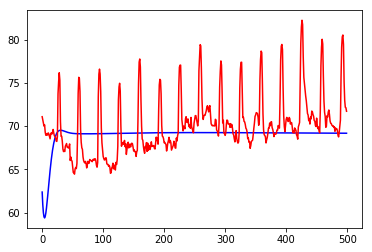

In [57]:
plt.plot(predicted_target, color = 'blue')
plt.plot(target_data_array, color = 'red')
plt.show()